In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import numpy as np
import os
import shutil
from keras.models import Sequential, load_model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
cv.__version__

'4.5.1'

### 数据集增强/增广

In [3]:
#简单的二分类
train_dir = 'G:\\深度学习\\Zebra\\Zebra\\train'#训练集文件
val_dir = 'G:\\深度学习\\Zebra\\Zebra\\test'  #验证集文件
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, (50, 50), batch_size=20, class_mode='binary', shuffle=True)
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(val_dir, (50, 50), batch_size=20, class_mode='binary')

Found 332 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


### 搭建CNN模型

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         1

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(), 
              metrics=['acc']
             )
history = model.fit_generator(train_generator,
                              steps_per_epoch=17, 
                              epochs=25,
                              validation_data=validation_generator, 
                              validation_steps=6)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
17/17 [==============================] - 10s 562ms/step - loss: 0.6244 - acc: 0.5964 - val_loss: 0.4819 - val_acc: 0.6455
Epoch 2/25
17/17 [==============================] - 6s 364ms/step - loss: 0.4587 - acc: 0.8404 - val_loss: 0.2532 - val_acc: 0.9273
Epoch 3/25
17/17 [==============================] - 8s 449ms/step - loss: 0.2807 - acc: 0.9066 - val_loss: 0.2661 - val_acc: 0.9000
Epoch 4/25
17/17 [==============================] - 8s 492ms/step - loss: 0.2059 - acc: 0.9247 - val_loss: 0.1531 - val_acc: 0.9636
Epoch 5/25
17/17 [==============================] - 7s 400ms/step - loss: 0.1464 - acc: 0.9548 - val_loss: 0.2179 - val_acc: 0.9091
Epoch 6/25
17/17 [==============================] - 9s 555ms/step - loss: 0.1220 - acc: 0.9608 - val_loss: 0.1849 - val_acc: 0.9364
Epoch 7/25
17/17 [==============================] - 9s 504ms/step - loss: 0.0811 - acc: 0.9729 - val_loss: 0.2013 - val_acc: 0.9091

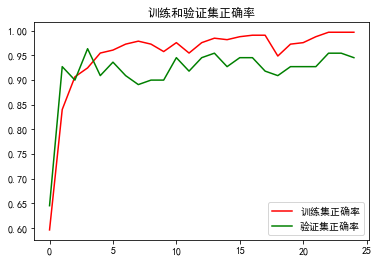

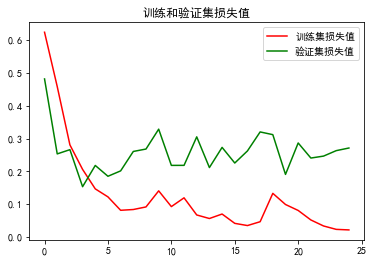

In [8]:
# 显示训练结果
plt.rcParams['font.sans-serif']='SimHei'#正常显示中文
plt.rcParams['axes.unicode_minus']=False#正常显示符号
epochs = range(25)
plt.figure(num=1)   # 正确率
plt.plot(epochs, history.history['acc'], label='训练集正确率',color='red')
plt.plot(epochs, history.history['val_acc'], label='验证集正确率',color='green')
plt.title('训练和验证集正确率')
plt.legend()
plt.figure(num=2)   # 损失函数
plt.plot(epochs, history.history['loss'], label='训练集损失值',color='red')
plt.plot(epochs, history.history['val_loss'], label='验证集损失值',color='green')
plt.title('训练和验证集损失值')
plt.legend()
plt.show()

### 模型标签

In [32]:
print(train_generator.class_indices)

{'others': 0, 'zebra crossing': 1}


In [36]:
def yu(path):
    imga = cv.imread(path)
    img = imga/255.0
    img = img.reshape([1,50,50,3])
    return img,imga
Break= 0
for i in os.listdir('G:/Zebra/Zebra/test/'):
    for j in os.listdir('G:/Zebra/Zebra/test/'+i):
        path = 'G:\\Zebra\\Zebra\\test\\'+i+'\\'+j
        img,img_1 = yu(path)
        number = model([img])
        """
        在这里我们把阈值设置为0.5,
        """
        a = round(number.numpy()[0][0],0)
        if dict_per[i]!=a:
            plt.imshow(img_1)
            print('预测标签---',a,'   正确标签--',dict_per[i])
            print('预测类别---',dict_fan[a],'   正确类别--',i)
            Break += 1
            break
    if Break==1:
        break
        

预测标签--- 1.0    正确标签-- 0
预测类别--- zebra crossing    正确类别-- others


In [ ]:
dict_fan = {0:'others',1:'zebra crossing'}

In [ ]:
dict_per = train_generator.class_indices
dict_fan = {0:'others',1:'zebra crossing'}